In [ ]:
#1. 구글 드라이브 연결
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
#2. 구글 드라이브 디렉토리 확인 및 이동
!ls /content/gdrive

In [ ]:
cd /content/gdrive/MyDrive/DLbook     

In [ ]:
print("Download Example Repository")
!git clone https://github.com/jetsonai/DeepLearning4Projects

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv",encoding='cp949') # 데이터 불러오기

### 코드 1.1. 평균 제곱 오차 계산

In [1]:
import numpy as np
# mse_function 함수
def mse_function(y, t):
    return np.sum((y - t) ** 2).mean()
    #return 0.5 * np.sum((y - t) ** 2)

# 정답 데이터
t = [0,0,0,1,0,0,0,0,0,0] # 한 원소만 1로 하고 그 외는 0으로 나타내는 원-핫 인코딩
# 정답은 3

# 모델 출력 값의 예 2개 y1, y2 (신경망이 추정한 값/확률)
y1 = [0.01, 0.03, 0.1, 0.8, 0.1, 0.1, 0.02, 0.1, 0.0, 0.01]
# 추론하여 나온 결과값이 3일 확률이 제일 높다고 나온 경우(잘 추정된 값)

y2 = [0.01, 0.03, 0.1, 0.07, 0.1, 0.1, 0.02, 0.1, 0.8, 0.01]
# 추론하여 나온 결과값이 8일 확률이 제일 높다고 나온 경우(잘못 추정된 값)

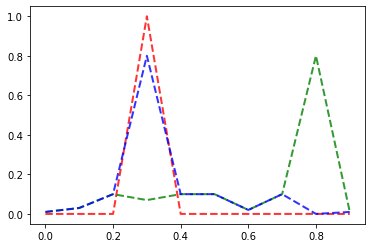

In [2]:
import matplotlib.pyplot as plt

array = np.arange(0, 1, 0.1)

plt.plot(array, t, c='r', linestyle='--', linewidth=2, alpha=0.8)
plt.plot(array, y2, c='g', linestyle='--', linewidth=2, alpha=0.8)
plt.plot(array, y1, c='b', linestyle='--', linewidth=2, alpha=0.8)

plt.show()

# 그래프를 보면 정답 데이터 t의 그래프와 y1의 그래프 개형이 비슷한 것을 볼 수 있다.

In [3]:
# y1의 경우 평균 제곱 오차 계산결과 출력
mse1 = mse_function(np.array(y1), np.array(t))
print(mse1)

0.08149999999999999


In [4]:
# y2의 경우 평균 제곱 오차 계산결과 출력
mse2 = mse_function(np.array(y2), np.array(t))
print(mse2)

1.5464


In [ ]:
# y2보다 y1의 평균 제곱 오차 값이 더 작은 것을 알 수 있다.
# 평균 제곱 오차 값이 작으면 작을수록 좋다.

### 코드 1.2. 크로스 엔트로피 오차 계산

In [8]:
#  cee_function 함수
def cee_function(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# 로그 함수 값이 음의 무한대로 발산하여 계산할 수 없는 것을 방지하기 위해 아주 작은 델타값 더해준다.

#  정답 레이블
t = [0,0,0,1,0,0,0,0,0,0]
# 정답은 3

# 모델 출력 값의 예 2개 y1, y2
y1 = [0.01, 0.03, 0.1, 0.8, 0.1, 0.1, 0.02, 0.1, 0.0, 0.01]
# 추론하여 나온 결과값이 3일 확률이 제일 높다고 나온 경우(잘 추정된 값)

y2 = [0.01, 0.03, 0.1, 0.07, 0.1, 0.1, 0.02, 0.1, 0.8, 0.01]
# 추론하여 나온 결과값이 8일 확률이 제일 높다고 나온 경우(잘못 추정된 값)

In [9]:
#  y1의 경우 교차 엔트로피 오차 계산결과 출력
see1 = cee_function(np.array(y1), np.array(t))
print(see1)

0.22314342631421757


In [10]:
#  y2의 경우 교차 엔트로피 오차 계산결과 출력
see2 = cee_function(np.array(y2), np.array(t))
print(see2)

2.6592586083623697


In [ ]:
# y2보다 y1의 교차 엔트로피 오차 값이 더 작은 것을 알 수 있다.
# 교차 엔트로피 오차 값이 작으면 작을수록 좋다.

In [ ]:
# MNIST 데이터셋은 숫자 손글씨 이미지에 대한 데이터와 라벨이 포함되어 있다. 
# 60000개의 트레이닝 데잍와 10000개의 테스트 데이터가 있다.

In [ ]:
# 패키지 임포트

import numpy as np
import torch 
# 파이토치는 파이썬 기반의 오픈 소스 머신러닝 라이브러리
import torch.nn.functional as F
import torch.nn as nn 
# 신경망 구성 요소
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
# 데이터 전처리 할 떄 진행상태를 시각적으로 보여주는 라이브러리

In [ ]:
# mnist 데이터 다운로드
# transforms.ToTensor()로 설정해서 이미지를 텐서로 변환
# Tensor(텐서): 배열의 집합 / 데이터를 표현하는 다차원 배열

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

# root는 데이터셋이 저장될 경로/ datasets 폴더를 사용함
# train=True/False는 데이터셋의 용도를 지정. True로 설정하면 학습 데이터 셋/False로 설정하면 테스트 데이터 셋
# trainsform=transforms.ToTensor()는 불러온 이미지 데이터를 파이토치의 텐서 형태로 변환하는 작업 수행, 모델 학습에 적합한 데이터 형태로 만들어주는 중요한 단계
# download=True로설정하면 데이터셋이 지정한 경로에 없을 경우 인터넷에서 자동으로 다운로드/데이터셋이 해당 경로에 있으면 다운로드 하지 않음

In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

# batch_size=100: 데이터를 얼마나 큰 배치로 나눌지를 정한다. 데이터 로더는 데이터셋에서 100개의 샘플을 묶어 하나의 배치로 만들어 준다.
# 배치의 크기는 모델이 한 번에 처리할 데이터의 양을 결정한다.
# shuffle: 데이터를 배치로 만들기 전에 데이터셋을 섞을지 여부를 결정
# shuffle=True: 에포크마다 train 데이터셋을 무작위로 섞어서 모델이 특정 순서에 의존하지 않게 함
# shuffle=False: test 데이터셋 데이터 순서 그대로 유지 / 테스트 단계에서는 모델이 이미 학습을 마쳤기 때문에 데이터 섞을 필요 없다.

In [ ]:
# 네트워크 정의

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# input_size는 모델의 입력 크기를 정의한다. MNIST 이미지는 28X28 픽셀이므로, 이를 일렬로 펼쳤을 때의 크기인 784가 입력 크기가 된다.
# hidden_size는 두 개의 은닉층(hidden layers)을 가진 신경망에서 각 은닉층의 뉴런 수를 배열로 정의/ 첫 번째 은닉층에는 128개의 뉴런, 두 번째 은닉층에는 64개의 뉴런
# output_size는 모델 출력의 크기를 정의, MNIST 데이터의 경우 0부터 9까지의 10개 숫자를 분류해야 하므로 출력 크기는 10이다.

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# 실제 신경망 모델을 구성한다.
# nn.Sequential은 여러 신경망 층을 순차적으로 연결할 때 사용
# nn.Linear(input_size, hidden_sizes[0])은 입력층과 첫 번째 은닉층 사이의 선형 변환(가중치와 편향을 사용한)을 수행하는 층을 생성
# nn.ReLU()는 비선형 활성화 함수인 ReLU(Rectified Linear Unit)를 적용하는 층/모델이 선형 문제뿐만 아니라 비선형 문제도 해결할 수 있게 해준다.
# 첫 번째 은닉층과 두 번째 은닉층 사이, 그리고 두 번째 은닉층과 출력층 사이에도 각각 선형 변환과 ReLU 활성화 함수를 적용
# nn.Linear(hidden_sizes[1], output_size)는 마지막 은닉층과 출력층 사이의 선형 변환을 수행
# nn.LogSoftmax(dim=1)는 최종 출력에 로그 소프트맥스 활성화 함수를 적용
# 다중 클래스 분류 문제에서 사용되며, 각 클래스에 대한 확률 로그를 출력하여, 나중에 손실 함수를 계산할 때 사용
# dim=1은 함수가 작업을 수행할 차원을 지정

In [ ]:
# 손실함수와 최적화

criterion = nn.CrossEntropyLoss() #크로스 엔트로치 오차 손실함수 사용
optimizer = torch.optim.SGD(model.parameters(), lr=0.09)

# 모델의 예측값과 실제값 사이의 차이, 즉 손실(loss)을 계산하는 함수를 정의
# 크로스 엔트로피 손실 함수는 분류 문제, 특히 다중 클래스 분류 문제에서 널리 사용
# 모델의 출력(로짓, softmax 적용 전의 값들)과 실제 타깃 클래스 간의 크로스 엔트로피 손실을 계산
# 손실 값은 모델이 얼마나 잘 예측하는지를 나타내며, 학습 과정에서 이 값을 최소화하는 방향으로 모델의 파라미터를 조정

# optimizer는 모델의 파라미터를 업데이트하는 방법, 즉 최적화 알고리즘을 정의
# SGD(Stochastic Gradient Descent, 확률적 경사 하강법)를 사용
# SGD는 손실 함수의 기울기(gradient)를 계산하여, 이를 사용해 모델 파라미터를 업데이트
# lr=0.09는 학습률(learning rate)을 의미하는데, 이 값은 각 학습 단계에서 파라미터를 얼마나 조정할지를 결정
# 습률이 너무 높으면 학습 과정이 불안정해질 수 있고, 너무 낮으면 학습이 너무 느리게 진행

In [ ]:
# 훈련
epochs = 15

# epochs는 전체 훈련 데이터셋을 몇 번 반복해서 학습할지를 정하는 값
# 여기서는 15번의 반복 학습 실행

for e in range(epochs): # 각 에폭마다 모델은 전체 훈련 데이터셋을 한 번씩 처리
    running_loss = 0 # 현재 에폭에서의 누적 손실을 추적, 각 배치에서의 손실을 더해가며, 에폭이 끝날 때 평균 손실을 계산
    for images, labels in train_loader: # 데이터로더에서 배치 하나를 가져와서 처리
        images = images.view(images.shape[0], -1) # 이미지 형태 변경, 이미지는 [배치크기,채널,높이,너비]의 형태를 가진다. 이미지를 2D 텐서로 평탄화하여 신경망에 입력할 수 있는 형태로 변환
    
        optimizer.zero_grad() # 최적화를 수행하기 전에 모든 매개변수의 기울기를 0으로 초기화/기울기가 누적되는 것을 방지하기 위해 학습 단계마다 호출
        
        #모델 계산
        output = model(images) # 이미지 배치를 입력으로 주고 예측 결과 얻기

        #손실 계산
        loss = criterion(output, labels) # 모델의 출력과 실제 레이블 사이의 손실 계산
        
        #역전파(각 매개변수에 대한 손실의 변화도를 저장)
        loss.backward() # 계산된 손실을 기반으로 역전파를 수행하여 각 매개변수에 대한 손실의 기울기 계산
        
        #최적화(역전파 단계에서 수집된 변화도로 매개변수 조정)
        optimizer.step() # 역전파 단계에서 계산된 기울기를 사용하여 모델의 매개변수 조정
        
        running_loss += loss.item() # 현재 배치의 손실을 running_loss에 추가한다.
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
        # 각 에폭이 끝날 때마다 평균 훈련 손실을 출력/평균 손실은 해당 에폭에서의 총 손실을 배치의 수로 나눈 값

In [ ]:
# 테스트
correct = 0

# correct 변수는 모델이 올바르게 예측한 샘플의 수를 추적한다.

total = len(mnist_test) # total 변수는 테스트 데이터 셋의 총 샘플의 수
with torch.no_grad(): # 기울기 계산을 비활성화/테스트 단계에서 메모리 사용량을 줄이고 연산 속도 향상
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader): # 테스트 데이터셋 배치 단위로 불러오기/tqdm은 진행 상태 표시줄을 추가하여 반복문의 진행 상태를 시각적으로 표시
        # Forward pass
        #x = images.view(-1, 28*28)
        x = images.view(images.shape[0], -1) # 테스트 이미지 배치의 형태를 변경, 평탄화 과정을 통해 모델에 입력할 수 있는 형태로 변환
        y = model(x) # 변환된 이미지 배치를 x를 모델에 입력하여 모델의 예측 결과를 얻는다.
        
        predictions = torch.argmax(y, dim=1) # 모델의 출력에서 가장 높은 값을 가진 인덱스를 찾는다. 인덱스는 모델의 예측 크래스를 나타낸다. dim=1은 클래스 확률이 있는 차원
        correct += torch.sum((predictions == labels).float()) # 예측과 실제 레이블이 일치하는 경우의 수를 세어 correct 변수에 더한다. 예측이 정확한 경우 1, 그렇지 않은 경우 0의 텐서를 생성, float()은 불리언 텐서를 실수형 텐서로 변환
    
print('Test accuracy: {}'.format(correct/total))
# 정확하게 예측된 샘플의 수를 총 샘플 수로 나누어 모델의 정확도 계산하여 출력
# 학습된 모델이 테스트 데이터 셋을 얼마나 잘 예측하는지 정확도를 통해 평가